In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
train=pd.read_csv(r"C:\Users\Pula Advisors\Desktop\25d-PyData_Class\datasets\train.csv")

In [11]:
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
0,0,19/12/2022,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg
1,1,21/11/2023,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg
2,4,01/02/2022,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg
3,5,19/03/2023,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg
4,6,18/07/2022,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg


In [13]:
train.tail(10)

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg
901,1039,16/03/2024,338,9,33.757819,37.132463,5,0,22.121685,EXPERT,MeAt,34.751027860371266 kg
902,1040,10/12/2022,329,10,30.344157,78.395361,5,0,19.357028,Intermediate,dairy,43.91055238295943 kg
903,1041,09/02/2024,415,11,28.085119,75.748973,4,0,8.919918,NaN,MeAt,41.32126700510049 kg
904,1042,11/05/2022,198,6,18.945034,58.184626,2,0,18.296057,EXPERT,GRAINS,25.533362473945573 kg
905,1043,21/05/2024,202,9,14.779768,76.859754,1,0,41.520740,intermediate,MeAt,42.88728265418715 kg
906,1044,29/03/2022,395,18,17.354199,45.138435,1,0,40.550668,Intermediate,GRAINS,50.36915178978074 kg
907,1045,27/11/2022,483,11,24.912137,59.485091,6,0,36.470276,intermediate,dairy,43.07012119080947 kg
908,1046,12/04/2023,243,11,28.870945,70.508404,2,0,19.767203,Intermediate,MeAt,29.63256008394076 kg
909,1048,14/02/2022,406,10,19.061638,55.286642,0,0,28.560361,EXPERT,MEAT,44.615759364510275 kg
910,1049,10/05/2024,350,6,23.708015,51.351286,4,0,46.786860,intermediate,Vegetables,57.0664809637605 kg


In [14]:
#convert date to datetime object
train['date']=pd.to_datetime(train['date'],format= 'mixed')
train['date'].dtype

dtype('<M8[ns]')

In [19]:
train['day']=train['date'].dt.dayofweek
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,day_of_week,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,1,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,1,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,6,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [20]:
#now drop the day of the week column, we do not need it
train.drop('day_of_week',axis=1,inplace=True)
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465336432905 kg,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,MeAt,51.54905281454645 kg,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,Beginner,MeAt,53.008322732556536 kg,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,Beginner,MeAt,48.62152711280995 kg,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,Intermediate,MEAT,44.15698435866615 kg,0


In [26]:
'''notice the food waste is stored as a string, but we want it to be numerical,
first we have to remove the 'kg' at the end and then convert that to numerical'''

train['food_waste_kg'] = train['food_waste_kg'].astype(str).str.replace('kg', '').astype(float)

train['food_waste_kg'].dtype


dtype('float64')

In [29]:
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,MeAt,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,Beginner,MeAt,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,Beginner,MeAt,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,Intermediate,MEAT,44.156984,0


In [33]:
train['staff_experience']=train['staff_experience'].str.lower()
train['waste_category']=train['waste_category'].str.lower()
train.head()

,ID,date,meals_served,kitchen_staff,temperature_C,humidity_percent,special_event,past_waste_kg,staff_experience,waste_category,food_waste_kg,day
0,0,2022-12-19,196,13,27.887273,45.362854,0,7.740587,intermediate,dairy,28.946465,0
1,1,2023-11-21,244,15,10.317872,64.430475,0,42.311779,NaN,meat,51.549053,1
2,4,2022-01-02,148,16,27.714300,69.046113,0,41.184305,beginner,meat,53.008323,6
3,5,2023-03-19,157,19,19.173902,46.292823,0,41.543492,beginner,meat,48.621527,6
4,6,2022-07-18,297,10,26.375233,79.741064,0,26.525097,intermediate,meat,44.156984,0


In [12]:
train.dtypes

ID                    int64
date                 object
meals_served          int64
kitchen_staff         int64
temperature_C       float64
humidity_percent    float64
day_of_week           int64
special_event         int64
past_waste_kg       float64
staff_experience     object
waste_category       object
food_waste_kg        object
dtype: object

### Handling Missingness

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ID                911 non-null    int64         
 1   date              911 non-null    datetime64[ns]
 2   meals_served      911 non-null    int64         
 3   kitchen_staff     911 non-null    int64         
 4   temperature_C     911 non-null    float64       
 5   humidity_percent  911 non-null    float64       
 6   special_event     911 non-null    int64         
 7   past_waste_kg     911 non-null    float64       
 8   staff_experience  747 non-null    object        
 9   waste_category    911 non-null    object        
 10  food_waste_kg     911 non-null    float64       
 11  day               911 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(4), object(2)
memory usage: 82.0+ KB


In [37]:
import missingno as mn

<Axes: >

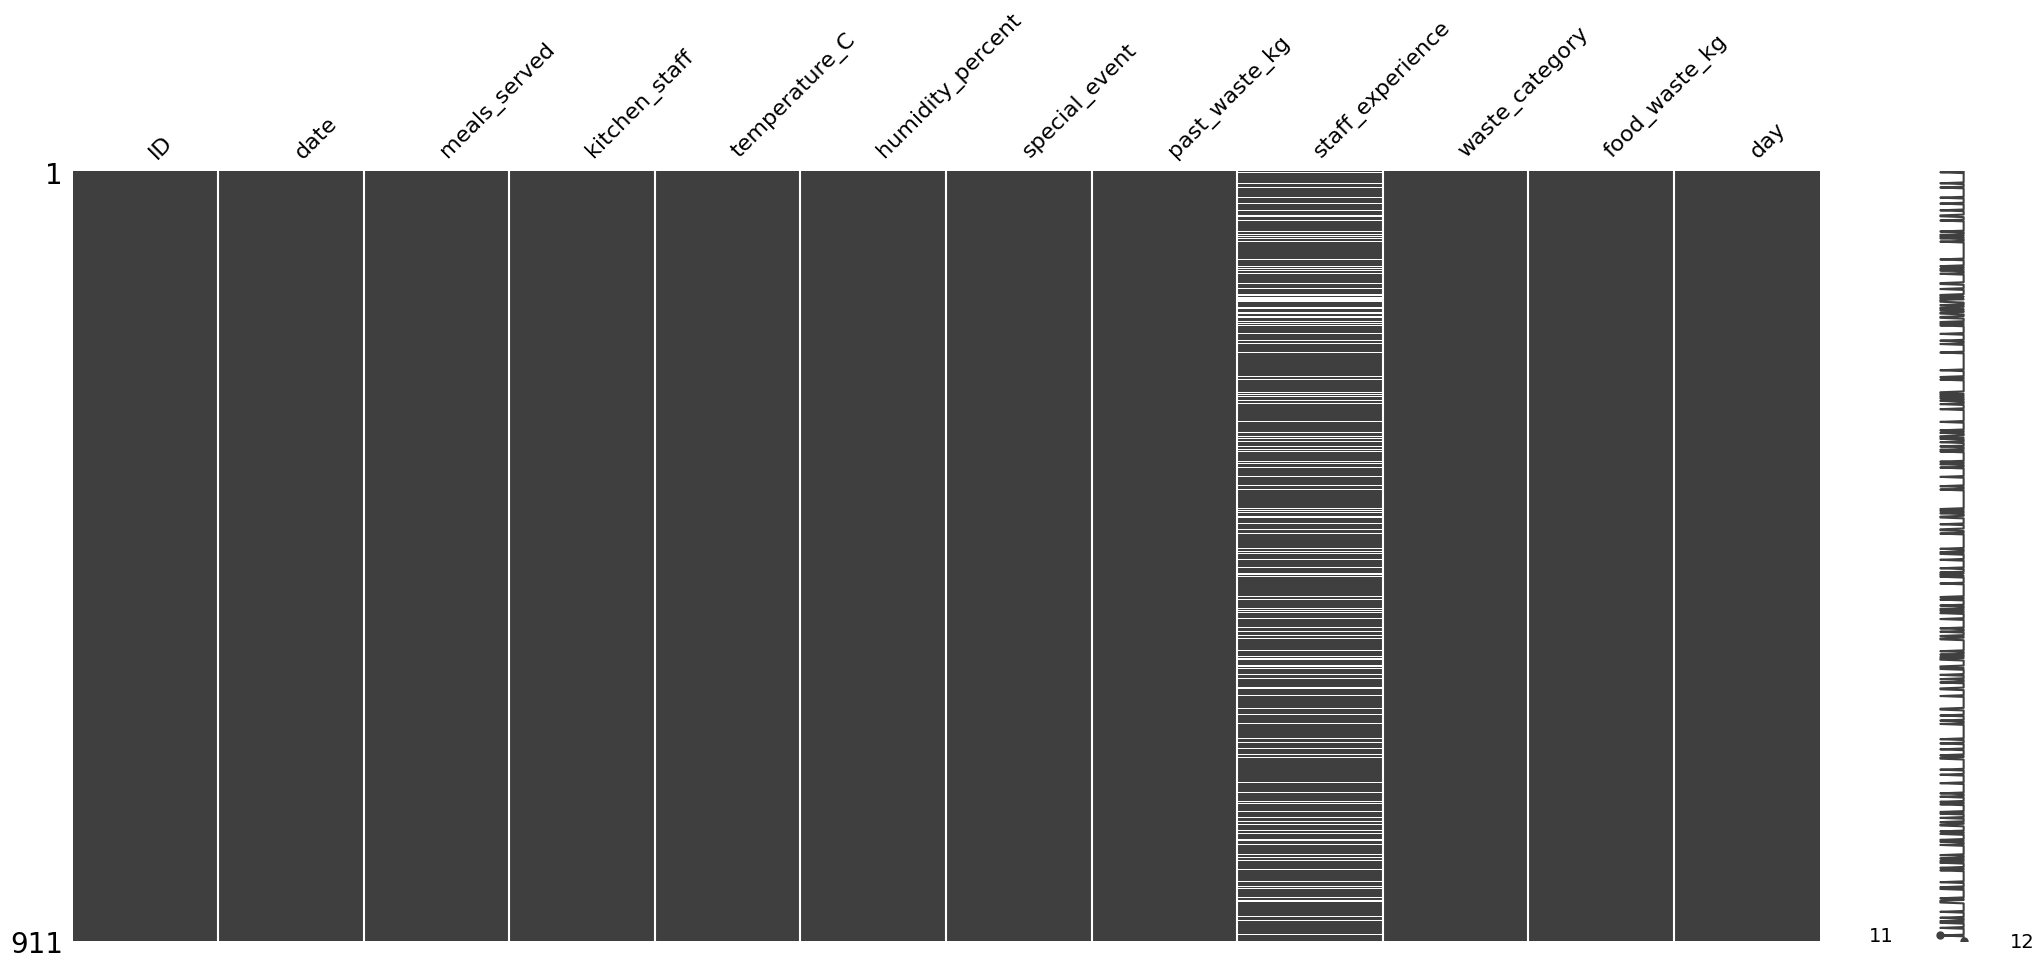

In [38]:
mn.matrix(train)

In [40]:
train.isnull().sum()

ID                    0
date                  0
meals_served          0
kitchen_staff         0
temperature_C         0
humidity_percent      0
special_event         0
past_waste_kg         0
staff_experience    164
waste_category        0
food_waste_kg         0
day                   0
dtype: int64

In [45]:
total_values=train.count()
total_missing=train.isnull().sum()
percent_missing=total_missing/total_values
percent_missing*100

ID                   0.000000
date                 0.000000
meals_served         0.000000
kitchen_staff        0.000000
temperature_C        0.000000
humidity_percent     0.000000
special_event        0.000000
past_waste_kg        0.000000
staff_experience    21.954485
waste_category       0.000000
food_waste_kg        0.000000
day                  0.000000
dtype: float64

In [55]:
null_mask=train.isnull().any(axis=1)
df_nulls=train[null_mask]

In [58]:
train['staff_experience'].fillna(train['staff_experience'].mode()[0],inplace=True)
train.isnull().sum()

ID                  0
date                0
meals_served        0
kitchen_staff       0
temperature_C       0
humidity_percent    0
special_event       0
past_waste_kg       0
staff_experience    0
waste_category      0
food_waste_kg       0
day                 0
dtype: int64

## Identifying and Handling Outliers

In [60]:
numeric_cols=train.select_dtypes(include=np.number).columns.tolist()
numeric_cols

['ID',
 'meals_served',
 'kitchen_staff',
 'temperature_C',
 'humidity_percent',
 'special_event',
 'past_waste_kg',
 'food_waste_kg',
 'day']

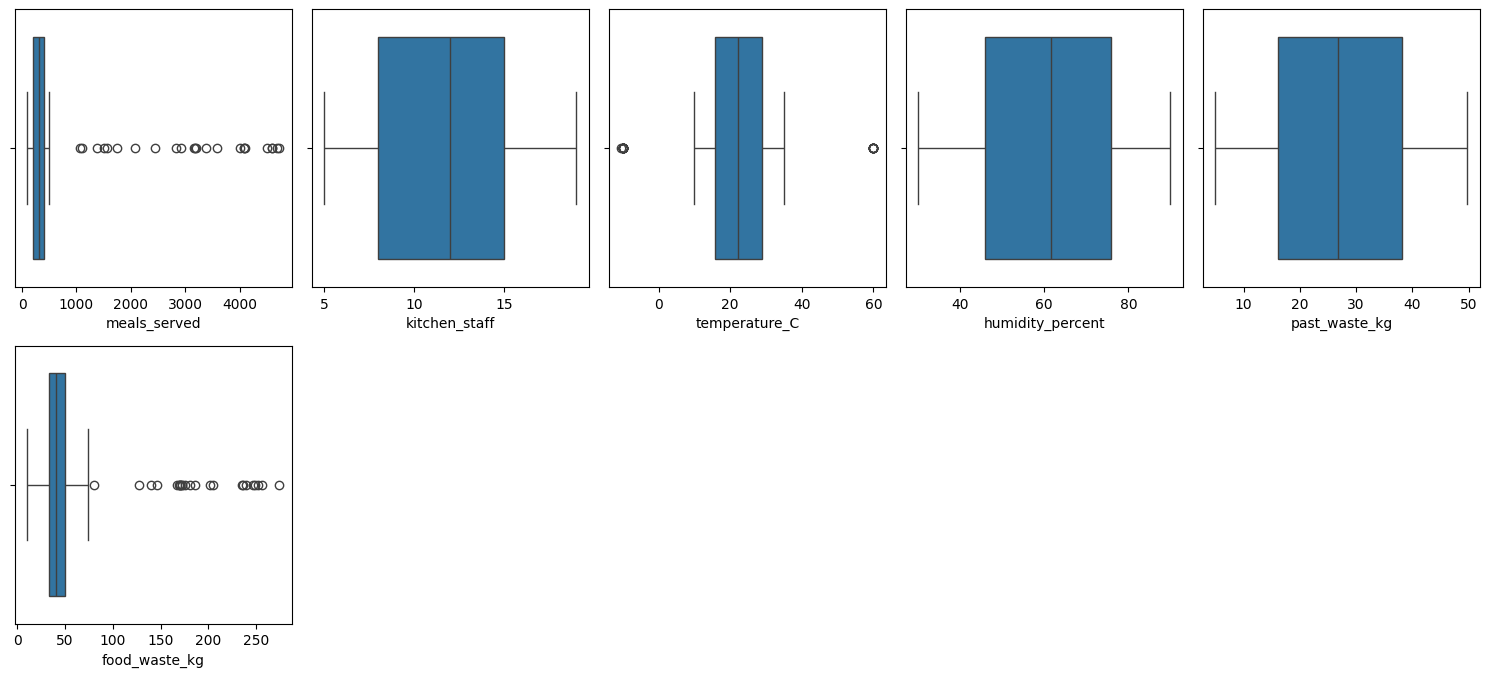

In [67]:
cols=['meals_served','kitchen_staff','temperature_C','humidity_percent','past_waste_kg','food_waste_kg']
num_df=train[cols]

fig = plt.figure(figsize=(15,30))
for i in range(len(cols)):
    ax= fig.add_subplot(9, 5, i+1)
    sns.boxplot(x=num_df.iloc[:, i],ax=ax)
plt.tight_layout()
plt.show()


In [68]:
temp_df=train['temperature_C']
temp_df.head()

0    27.887273
1    10.317872
2    27.714300
3    19.173902
4    26.375233
Name: temperature_C, dtype: float64

In [69]:
Q3=np.quantile(train['temperature_C'],0.75)
Q1=np.quantile(train['temperature_C'],0.25)

IQR=Q3-Q1

lower_range=Q1-(1.5*IQR)
upper_rannge=Q3+ (1.5*IQR)


In [76]:
clean_df=train[(train['temperature_C']>= lower_range) & (train['temperature_C']<=upper_rannge)]
clean_df.shape

(889, 12)